# Introdução

## Representação dos Dados

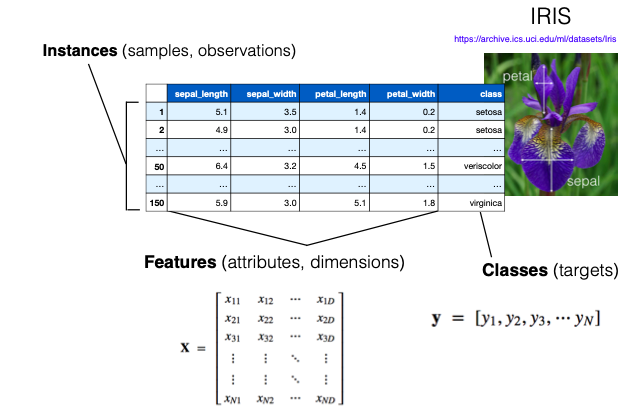

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import neighbors

## Carregamento do dataset

In [15]:
df = pd.read_csv('iris-dataset.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 
              'petal_width', 'class']

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [12]:
np.unique(y)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
df['class'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: class, dtype: int64

In [22]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
model.score(X, y)

0.96

In [23]:
y_pred = model.predict(X)

In [2]:
df = pd.read_csv('iris-dataset.csv', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Separação dos dados entre atributos (X) e rótulo (y)

In [3]:
X = df.values[:, :-1]
y = df.values[:, -1]

## Treinamento do modelo

In [26]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
model.score(X, y)

0.96

- Que score é esse? O que é isso?
- Esse modelo é burro ou o que?
- Que coisa mais sem graça tentar predizer o que já é conhecido.

Caminho possível: como não temos novos dados para avaliar se o modelo realmente é bom, podemos simular isso dividindo nosso conjunto de dados em 2 partes:
- Parte para treino do modelo (conjunto de treino)
- Parte para avaliação do modelo (conjunto de teste)

## Ajuste do modelo e Predição

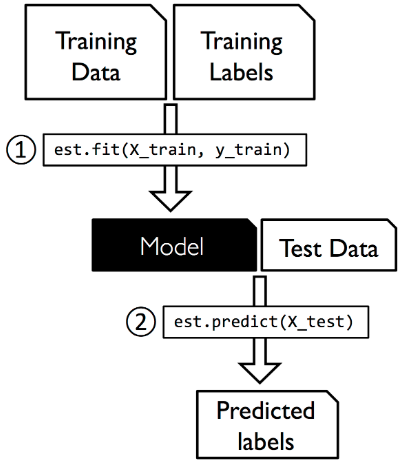

## Validação cruzada holdout

Consiste em dividir o conjunto de dados inicial em um conjunto de dados de treinamento e outro de teste. 

O primeiro é usado para treinamento de modelo e o último é usado para estimar seu desempenho de generalização.

### Passos: Fit e Predict

### Passos

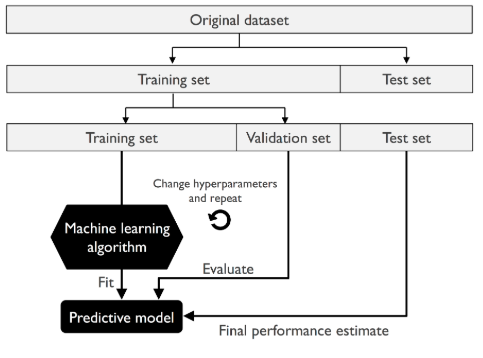

### Passos detalhados:

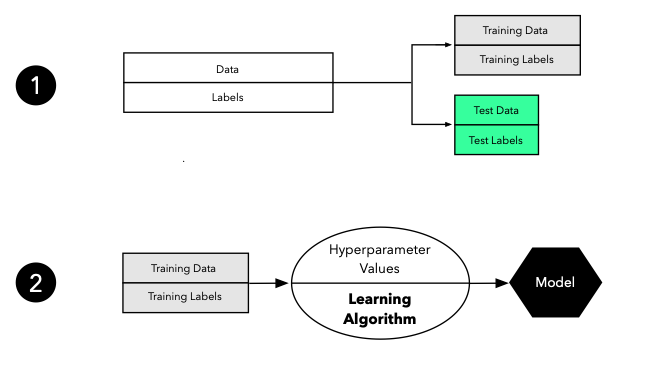

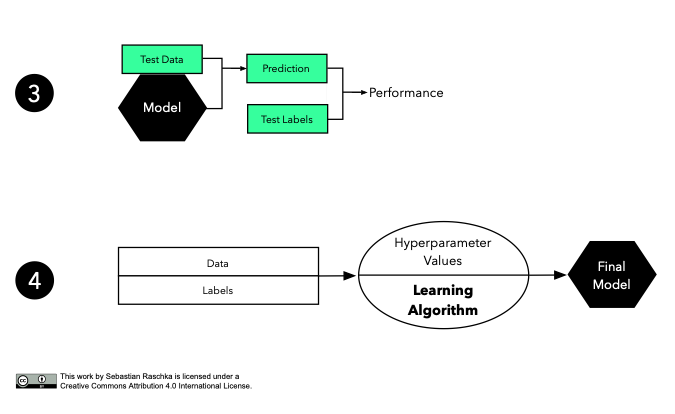

In [27]:
n = df.shape[0]
perc_train = 2/3
idx_train = np.arange(n * perc_train, dtype=int)
idx_test = np.arange(n * perc_train, n, dtype=int)

In [28]:
idx_train, idx_test

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]))

In [29]:
X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]
y_test = y[idx_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [30]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.0

- Meu Deus!!! Por que o resultado foi tão trágico?
- Parece que o modelo é burro mesmo, né? Especialmente para dados "novos".
- O que fazer agora?

### Embaralhando os dados - buscando ordem a partir do caos...

In [31]:
rand = np.random.RandomState(42)
indices = np.arange(X.shape[0])
print(indices)
rand.shuffle(indices)
print(indices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
[ 73  18 118  78  76  31  64 141  68  82 110  12  36   9  19  56 104  69
  55 132  29 127  26 128 131 145 108 143  45  30  22  15  65  11  42 146
  51  27   4  32 142  85  86  16  10  81 133 137  75 109  96 105  66   0
 122  67  28  40  44  60 123  24  25  23  94  39  95 117  47  97 113  33
 138 101  62  84 148  53   5  93 111  49  35  80  77  34 114   7  43  70
  98 120  83 134 135  89 

In [32]:
X_ = X[indices]
y_ = y[indices]
X_.shape, y_.shape

((150, 4), (150,))

In [33]:
X_train = X_[idx_train]
y_train = y_[idx_train]
X_test = X_[idx_test]
y_test = y_[idx_test]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [46]:
model = neighbors.KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.98
0.98


1.0

## Criação do modelo final

In [47]:
model = neighbors.KNeighborsClassifier(n_neighbors=8)
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

## Validação cruzada Holdout com conjunto de validação

### Passos

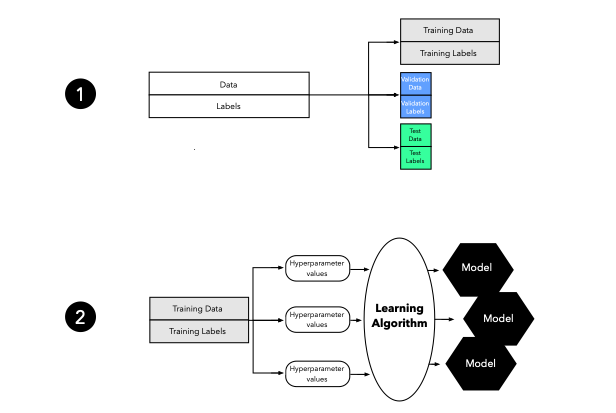

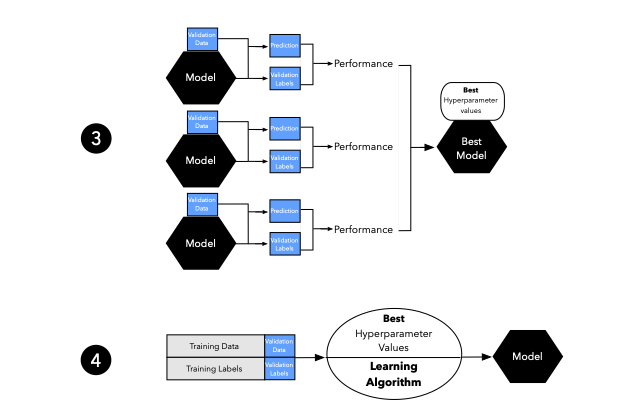

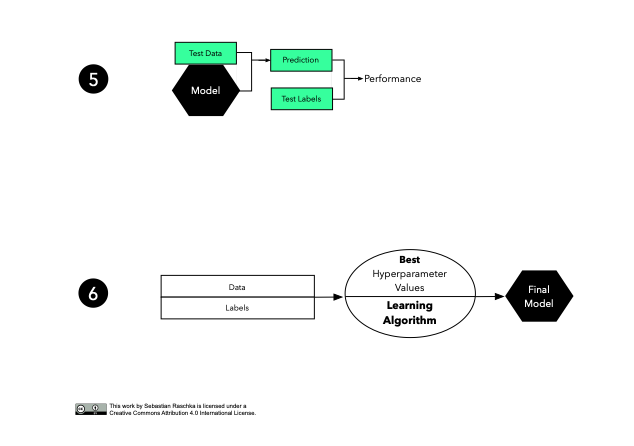